# Advanced usage of toppra output



In [16]:
# toppra
import toppra as ta
import toppra.constraint as constraint
import toppra.algorithm as algo
import numpy as np
# misc: for plotting and measuring time
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Random waypoints used to obtain a random geometric path. Here,
# we use spline interpolation.
dof = 6
np.random.seed(0)
way_pts = np.random.randn(3, dof)
path = ta.SplineInterpolator(np.linspace(0, 1, 3), way_pts)

# Create velocity bounds, then velocity constraint object
vlim_ = np.random.rand(dof) * 20
vlim = np.vstack((-vlim_, vlim_)).T
# Create acceleration bounds, then acceleration constraint object
alim_ = np.random.rand(dof) * 100
alim = np.vstack((-alim_, alim_)).T
pc_vel = constraint.JointVelocityConstraint(vlim)
pc_acc = constraint.JointAccelerationConstraint(
   alim, discretization_scheme=constraint.DiscretizationType.Interpolation)

t0 = time.time()
# Setup a parametrization instance, then retime
gridpoints = np.linspace(0, path.duration, 200)
instance = algo.TOPPRA([pc_vel, pc_acc], path, gridpoints=gridpoints, solver_wrapper='seidel')



In [17]:
sdd_grid, sd_grid, _, K_grid = instance.compute_parameterization(0, 0, return_data=True)

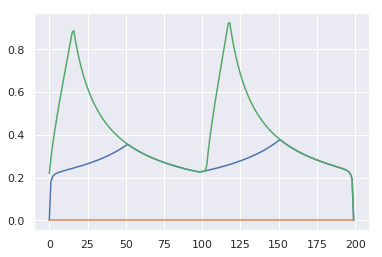

In [18]:
plt.plot(sd_grid, label='path velocity')
plt.plot(np.sqrt(K_grid[:, 0]), label='lower bound')
plt.plot(np.sqrt(K_grid[:, 1]), label='upper bound')
plt.show()